## Task 1

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220])

In [16]:
mean_x = x.mean()
median_x = np.median(x)

(_, idx, counts) = np.unique(x, return_index=True, return_counts=True)
index = idx[np.argmax(counts)]
mode_x = x[index]

print(f'Среднее значение: {mean_x}')
print(f'Медиана: {median_x}')
print(f'Мода: {mode_x}')

Среднее значение: 71.45
Медиана: 71.5
Мода: 74


In [17]:
print(f'Дисперсия Y: {y.var()}')

Дисперсия Y: 1369.2099999999998


(array([4., 3., 2., 3., 3., 2., 2., 1.]),
 array([66.   , 67.625, 69.25 , 70.875, 72.5  , 74.125, 75.75 , 77.375,
        79.   ]),
 <BarContainer object of 8 artists>)

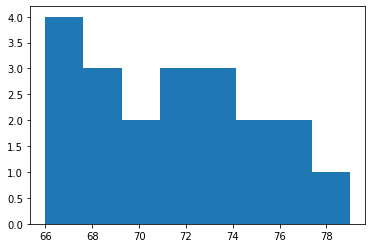

In [14]:
plt.hist(x, bins=8)

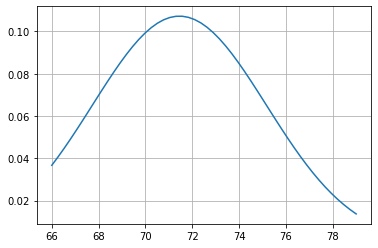

In [19]:
x_axis = np.linspace(x.min(), x.max())
y_axis = stats.norm.pdf(x_ax, x.mean(), x.std())

plt.plot(x_axis, y_axis)
plt.grid()

In [20]:
print(f'Возраст меньше 80 с вероятностью: {np.count_nonzero(x > 80) / len(x)}')

Возраст меньше 80 с вероятностью: 0.0


In [23]:
print(f'Двумерное матожидание: {np.mean([x, y], axis=1)}')
print(f'Матрица ковариации: {np.cov([x, y])}')

Двумерное матожидание: [ 71.45 164.7 ]
Матрица ковариации: [[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]


In [25]:
print(f'Коэффициент ковариации Х и Y: {np.corrcoef(x, y)[0, 1]}')

Коэффициент ковариации Х и Y: 0.8891701351748048


Text(0, 0.5, 'Вес')

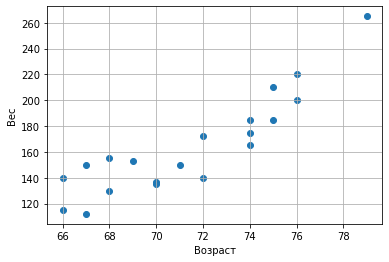

In [26]:
plt.scatter(x, y)
plt.grid()
plt.xlabel('Возраст')
plt.ylabel('Вес')

## Task 2

In [28]:
from IPython.display import display
from tabulate import tabulate

In [31]:
data = np.array([
    [17, 17, 12],
    [11,  9, 13],
    [11,  8, 19]
])

cov_matrix = np.cov(data.T)
display(tabulate(cov_matrix, 
                 headers=['X_1', 'X_2', 'X_3'], 
                 showindex=['X_1', 'X_2', 'X_3'],
                 tablefmt='html'))

print(f'Обощённая дисперсия: {np.linalg.det(cov_matrix)}')

,X_1,X_2,X_3
X_1,12,17,-8
X_2,17,24.3333,-12.8333
X_3,-8,-12.8333,14.3333


Обощённая дисперсия: 9.577387902356475e-14


## Task 3

In [55]:
values = [5, 6, 7]

N = 10000
a_mean, b_mean = 4, 8
a_std, b_std = 1, 2

Na = np.random.normal(a_mean, a_std, N)
Nb = np.random.normal(b_mean, b_std, N)

probs = [[np.count_nonzero(np.abs(Na - x) < 1) / N, np.count_nonzero(np.abs(Nb - x) < 1) / N]
         for x in values]

display(tabulate(probs, 
                 headers=['N_a', 'N_b'], 
                 showindex=values,
                 tablefmt='html'))

,N_a,N_b
5,0.4791,0.1376
6,0.1573,0.2416
7,0.0244,0.3394


Значение с равными вероятностями для обоих распределений: 5.655
Значение с равными вероятностями для обоих распределений: 5.656499999999999
Значение с равными вероятностями для обоих распределений: 5.6579999999999995
Значение с равными вероятностями для обоих распределений: 5.6595
Значение с равными вероятностями для обоих распределений: 5.6610000000000005
Значение с равными вероятностями для обоих распределений: 5.6625


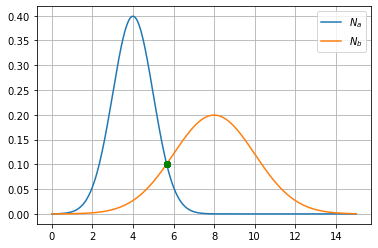

In [58]:
x = np.linspace(0, 15, N)
pdf_a = stats.norm.pdf(x, 4, 1)
pdf_b = stats.norm.pdf(x, 8, 2)
plt.plot(x, pdf_a)
plt.plot(x, pdf_b)
plt.grid()
plt.legend(['$N_a$', '$N_b$'])

for i in range(N):
    if np.abs(pdf_a[i] - pdf_b[i]) < 0.001 and 1000 < i < 7000:
        print(f'Значение с равными вероятностями для обоих распределений: {i / N * 15}')
        plt.plot(x[i], stats.norm.pdf(x[i], 4, 1), 'go')